# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

[In this notebook you're provided with hints and brief instructions and thinking prompts. Don't ignore them as they are designed to equip you with the structure for the project and will help you analyze what you're doing on a deeper level. Before submitting your project, make sure you remove all hints and descriptions provided to you. Instead, make this report look as if you're sending it to your teammates to demonstrate your findings - they shouldn't know you had some external help from us! To help you out, we've placed the hints you should remove in square brackets.]

[Before you dive into analyzing your data, explain the purposes of the project and hypotheses you're going to test.]

## Open the data file and have a look at the general information. 

[Start with importing the libraries and loading the data. You may realise that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

<div class="alert alert-info"> <b>Good Morning! </b> <br>
    It's saturday morning, I'm over a week late on this project. If it's ok with you, I'd like to turn this in as a rough draft. Get feedback and clarification on the work I've done so far, and if I'm on the right track, I'll finish the categorization and conclusions section on the next pass..
</div>


In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
try:
    df = pd.read_csv('credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')

#Test if the CSV loaded correctly
display(df.head(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

[Now let's explore our data. You'll want to see how many columns and rows it has, look at a few rows to check for potential issues with the data.]



<div class="alert alert-info"> <b>debt - zero or one???</b> <br>
Does a Zero mean the client was late on their debts? <br>
Does a One mean the client was late on their debts? <br>
Does a One or a Zero mean they defaulted. <br>
<br>

In [2]:
# Let's see how many rows and columns our dataset has
df.info()
index = df.index
number_of_rows = len(index)
df_original = df
print()
print(f' there are {number_of_rows} in the original dataframe')
#Looks like there is something odd going on with the days_employed and total_Income column. Will look into that.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB

 there are 21525 in the original dataframe


In [3]:
# Display the first 15 rows
display(df.head(20))


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


[Describe what you see and notice in your printed data sample. Are there any issues that may need further investigation and changes?]

 <div class="alert alert-info"> <b>Notes:</b> <br>
Negative Numbers in days employed <br>
NaN value in at row 12 for days_employed and total_income. <br>
Probable the pattern holds thought the whole dataset. <br>
As those are the columns that are out of sync from above <br>
Will investigate further <br>

</div>

[Are there missing values across all columns or just a few? Briefly describe what you see in 1-2 sentences.]

In [4]:
# Filtered table with missing values
df_nan = df[df.isna().any(axis=1)]
print(f'Rows in Total == {df.size}')
print(f'Rows with NaN == {df_nan.size}')
df_nan_difference = df.size - df_nan.size
print(f'{df.size} - {df_nan.size} == {df_nan_difference}')
print()


Rows in Total == 258300
Rows with NaN == 26088
258300 - 26088 == 232212



 <div class="alert alert-info"> <b>Note:</b> 
The values count from above suggested there should be 21525 non_null values... but I cound 232212... What am I missing?") <br>
    Oh Size and len are not the same.

</div>

In [5]:
#Test to see if the data is symetric or non symetric.
# is the number of rows were Nan days_employed and NaN total_income == the rows were NaN is True is both columns.
#df_sysc_total_income = df[df['total_income'].isnull()==True] 
#df_sync_days_employed = df[df['days_employed'].isnull()==True]
#display(df_sysc_total_income)
print(f'---df_sync_days_employed---')
#display(df_sync_days_employed)

df_sync = df[(df['days_employed'].isnull()) & (df['total_income'].isnull())].shape
print(df_sync)

---df_sync_days_employed---
(2174, 12)


 <div class="alert alert-info"> <b>Note:</b> 
DF_sync is designed to capture all of the rows where ['days_employed'] AND ['total_income'] have NaN values. <br>
    This returns 2174 rows. This is the same differene in row counts we expect to see from the values_count() expression earlier. <br>
Hypothesis If rows where 'days_employed' == x, AND rows 'total_income' == x, Then if the rows are the same rows, x should equil the number of rows where both Nan values for 'days_employed' and Nan values for 'total_income' are true. <br>
    <br>
    I'm trying to write a hypothesis. Please advise on a better way to write this out in simple language.

</div>

 <div class="alert alert-info"> <b>Hypothosis:</b> 
It seems probably that the rows with missing NaN values for both 'days_employed' and 'total_income' came from unemployed individuals. <br>
If these individuals were provided loans, Their default risk is likely very high. This should be testable in the data. As this class represents  ~10% of the total dataset, this is something we'll want to be mindful of moving foward.

</div>

In [6]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
print(f'The total data set is {df.size} rows long')
print(f'The NaN data set is {df_nan.size} rows long')
df_nan_percent = df_nan.size / df.size
print(f'Whow! The NaN rows are {df_nan_percent:.2%} of the dataframe. We might have a problem.')

# I wanted to practive a bit with f'strings, as they're still a bit intimidating. 
# Can re-write if needed for best practices.

The total data set is 258300 rows long
The NaN data set is 26088 rows long
Whow! The NaN rows are 10.10% of the dataframe. We might have a problem.


 <div class="alert alert-info"> <b>Note:</b> <br>
The total data set is 258300 rows long <br>
The NaN data set is 26088 rows long <br>
Whow! The NaN rows are 10.10% of the dataframe. We might have a problem. <br>
</div>

**Intermediate conclusion**

[Does the number of rows in the filtered table match the number of missing values? What conclusion can we make from this?]

[Calculate the percentage of the missing values compared to the whole dataset. Is it a considerably large piece of data? If so, you may want to fill the missing values. To do that, firstly we should consider whether the missing data could be due to the specific client characteristic, such as employment type or something else. You will need to decide which characteristic *you* think might be the reason. Secondly, we should check whether there's any dependence missing values have on the value of other indicators with the columns with identified specific client characteristic.]

[Explain your next steps and how they correlate with the conclusions you made so far.]

In [7]:
# Investigate clients who do not have data on identified characteristic and the column with the missing values

# Please clarificify this promt #

In [8]:
# Checking distribution

#df.days_employed.value_counts(normalize=True)
#display(df.education.value_counts(normalize=True))
print('-Original Data - income_type - ')
print(df['income_type'].value_counts(normalize=True))
print()
print('-NaN Data - income_type - ')
print(df_nan['income_type'].value_counts(normalize=True))
print()

#df.plot(x="purpose", y=["total_income"], kind="line", figsize=(10, 9))
#df_nan.plot(x="purpose", y=["dob_years"], kind="bar", figsize=(10, 9))

-Original Data - income_type - 
employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

-NaN Data - income_type - 
employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64



<div class="alert alert-info"> <b>Note: income_type</b> <br>
We created a dataframe of only the NaN data, and compared it's normalized value_counts to the original data, using income_type as our reference column. Distributions are similar, categories are within 1% of each other. <br>
</div>

In [9]:
# Running a similar analysis for age data
print('-Original Data - age')
print(df['dob_years'].value_counts(normalize=True).sort_index())
print()
print('-NaN Data - age')
print(df_nan['dob_years'].value_counts(normalize=True).sort_index())
print()


-Original Data - age
0     0.004692
19    0.000650
20    0.002369
21    0.005157
22    0.008502
23    0.011800
24    0.012265
25    0.016585
26    0.018955
27    0.022904
28    0.023368
29    0.025319
30    0.025087
31    0.026016
32    0.023693
33    0.026992
34    0.028014
35    0.028664
36    0.025784
37    0.024948
38    0.027782
39    0.026620
40    0.028293
41    0.028200
42    0.027735
43    0.023833
44    0.025412
45    0.023089
46    0.022067
47    0.022300
48    0.024994
49    0.023600
50    0.023879
51    0.020813
52    0.022485
53    0.021324
54    0.022253
55    0.020581
56    0.022625
57    0.021370
58    0.021417
59    0.020627
60    0.017515
61    0.016492
62    0.016353
63    0.012497
64    0.012311
65    0.009013
66    0.008502
67    0.007758
68    0.004599
69    0.003949
70    0.003020
71    0.002695
72    0.001533
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64

-NaN Data - age
0     0.004600
19    0.000460
20    0.002300
21    0.008280


<div class="alert alert-info"> <b>Note:</b> <br>
I'd love to print the two data frames above side by side for easier comparison <br>
    Let's go ahead and do that.
</div>

In [10]:
# We create two new dataframes and concatenate them together, then subtract the difference.
# Our anticipation was for a slight difference...

dob_years = df['dob_years'].value_counts(normalize=True).sort_index()
dob_years_nan = df_nan['dob_years'].value_counts(normalize=True).sort_index()

df_nan_age_compare  = pd.concat([dob_years,dob_years_nan], axis=1, keys=['dob_years','dob_years_nan'])
df_nan_age_compare['diference'] = df_nan_age_compare['dob_years'] - df_nan_age_compare['dob_years_nan']
print(df_nan_age_compare)

    dob_years  dob_years_nan  diference
0    0.004692       0.004600   0.000092
19   0.000650       0.000460   0.000190
20   0.002369       0.002300   0.000069
21   0.005157       0.008280  -0.003123
22   0.008502       0.007820   0.000682
23   0.011800       0.016559  -0.004759
24   0.012265       0.009660   0.002605
25   0.016585       0.010580   0.006006
26   0.018955       0.016099   0.002855
27   0.022904       0.016559   0.006344
28   0.023368       0.026219  -0.002851
29   0.025319       0.022999   0.002320
30   0.025087       0.026679  -0.001592
31   0.026016       0.029899  -0.003883
32   0.023693       0.017019   0.006674
33   0.026992       0.023459   0.003533
34   0.028014       0.031739  -0.003725
35   0.028664       0.029439  -0.000774
36   0.025784       0.028979  -0.003195
37   0.024948       0.024379   0.000569
38   0.027782       0.024839   0.002943
39   0.026620       0.023459   0.003161
40   0.028293       0.030359  -0.002066
41   0.028200       0.027139   0.001061


<div class="alert alert-info"> <b>Note: Age</b> <br>
Variance on the age variable is nominal. This supports our hypothisis that the NaN data does not corrilate around the Age Data.
</div>

<div class="alert alert-info"> <b>Note: </b> <br>
<b>education:</b> I'd like to run a simmilar analasis on the education column, but a quick review suggest that column needs to be cleaned up. all data will need to be shifted to lowercase, and the data needs to be cleaned up a bit.
    <br>
<b>days_employed:</b> I suspect days_employed can be shifted to absolute value to make all numbers positive. <br>
<b>purpose:</b> The purpose column is going to need a serous reoganization. Default Categories are a mess. <br>
    <b>income_type: </b> No significant variance with income_type <br>
    <b>age: </b> There is a person age zero in the age data, that's not a good sign. low variance in Age NaN Data.<br>
    <br>
</div>

In [11]:
# Check for other reasons and patterns that could lead to missing values
# ???
# What am I missing?

<div class="alert alert-info"> <b>Intermediate conclusion</b> <br>
The rows with NaN data do not seem to corilate against any of the columns we tested for. <br>
My Hypothisis is that there is an error at the data origination level, and I suspect it is tied to unemployment, as that would explain why a person does not have either a Job or Income. <br>
However if this data set is people who already have loans, not just applications, then we have a larger problem on our hands. <br>
<br>
<b> In a Real World Enviroment, it would be critical to seek out answers from within the organization for why this data is missing or corrupted. Employment Status is the number one indicator for mortage defaults, and probably personal loan defaults in general. 10% of our data is missing income and employment status. Networth, and liquid networth are also major contributing factors, as well as other outstanding liabilities and we don't have data for those categories at all.</b> <br>
<br>

</div>

<div class="alert alert-info"> <b>Next Steps | Data transformation </b> <br>
Review each column and determine what issues we have, and what repair the data. <br>
Duplicates <br>
different registers <br>
incorrect artifacts <br>
missing values <br>

</div>

In [12]:
# creating a new variable called data, which we'll use for datatransformations.
data = df
# renaming 'dob_years' to 'age'
data = data.rename(columns = {'dob_years' : 'age'})
                   
#Check it worked
data.head(2)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase


In [118]:
# age vs income_type
print(data.pivot_table(index='age', columns='income_type', values='debt', aggfunc='count', margins=True))

income_type  business  civil servant  retiree  unemployed    All
age                                                             
19               13.0            1.0      NaN         NaN     14
20               49.0            2.0      NaN         NaN     51
21              103.0            7.0      NaN         NaN    110
22              175.0            6.0      1.0         NaN    182
23              240.0           11.0      NaN         NaN    251
24              243.0           19.0      1.0         NaN    263
25              330.0           27.0      NaN         NaN    357
26              368.0           37.0      2.0         NaN    407
27              452.0           37.0      3.0         NaN    492
28              463.0           38.0      NaN         NaN    501
29              495.0           49.0      NaN         NaN    544
30              490.0           46.0      NaN         NaN    536
31              502.0           52.0      1.0         1.0    556
32              463.0    

<div class="alert alert-info"> <b>Next Steps | Data transformation </b> <br>
1 entrepreneur who is 27, and another who is 58 years old. <br>
What kind of sample has so few business owners? <br>
Perhaps business owners are getting filtered into another product?
</div>

In [14]:
# Let's see all values in education column to check if and what spellings will need to be fixed
print(data['education'].unique())

["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']


In [15]:
# Fix the registers if required

#lets's make everything lowercase to start.
data['education'] = data['education'].str.lower()

#test
print(data['education'].unique())

["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']


[Check the data the `children` column]

In [16]:
# Let's see the distribution of values in the `children` column
#print(data['children'].unique())
print(data['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


<div class="alert alert-info"> <b> Observation </b> <br>
76 people have 20 children - that's probably a fat finger error. Let's change that to 2. <br>
47 people have "-1", Either the punchline of a funny joke about mathematicians with impossible chidlren, or an error. <br>
    
</div>

In [17]:
#replace 20 with 2 in the children column
data['children'] = data['children'].replace(20,2)

#test
print(data['children'].value_counts())
# 2055 + 76 == 2131


 0    14149
 1     4818
 2     2131
 3      330
-1       47
 4       41
 5        9
Name: children, dtype: int64


<div class="alert alert-info"> <b> next step </b> <br>
Drop the rows with a -1's in the children's data, as it only represents < .0002 of the total data set.<br>
    
    
</div>

In [18]:
# drop -1 in ['children']
data.drop(data[data['children'] == -1].index, inplace = True)

# test
print(data['children'].value_counts())

0    14149
1     4818
2     2131
3      330
4       41
5        9
Name: children, dtype: int64


[Check the data in the `days_employed` column. Firstly think about what kind of issues could there be and what you may want to check and how you will do it.]

In [19]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
print(data['days_employed'].value_counts())

-327.685916       1
 361900.083341    1
-2828.237691      1
-2636.090517      1
-410.978864       1
                 ..
-881.454684       1
-794.666350       1
 372337.985304    1
 368826.785036    1
-3382.113891      1
Name: days_employed, Length: 19307, dtype: int64


<div class="alert alert-info"> <b> observation</b> <br>
Lots of unique entries<br>
Negative numbers as we noticed before <br>
    <br>
    Let's converte the negative numbers to their absolute value. <br>
    And do some quick math to get a sense for what these numbers look like in years.
</div>

In [20]:
# Address the problematic values, if they exist
data['days_employed'] = abs(data['days_employed'])


In [21]:
# Check the result - make sure it's fixed

print(data['days_employed'].value_counts())


142.276217       1
886.253127       1
390574.985524    1
891.505415       1
358708.621042    1
                ..
4086.407828      1
1259.497032      1
985.798488       1
357.207058       1
1636.419775      1
Name: days_employed, Length: 19307, dtype: int64


In [22]:
data['years_employed'] = data['days_employed'] / 365

#test
display(data.head(5))

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814


<div class="alert alert-info"> <b> A Question on years worked? </b> <br>
How long have these people been working! <br>
    Row 5 has been working for over 900 years!<br>
    Looks like we have another problem to address...
</div>

In [23]:
#Above I added a years employed calculation, 
# and sorted the data in assending order.
# I'm also going to dropna for this df because they're getting in the way of this experiment.

data_sort = data.sort_values(by = 'years_employed', ignore_index = True)
data_sort.dropna(inplace=True)
data_sort.reset_index(drop=True, inplace=True)
display(data_sort.head(-10))


,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,24.141633,31,secondary education,1,married,0,F,employee,1,26712.386,university education,0.066141
1,0,24.240695,32,bachelor's degree,0,unmarried,4,M,employee,0,19858.460,to get a supplementary education,0.066413
2,2,30.195337,47,secondary education,1,civil partnership,1,M,business,0,37033.790,wedding ceremony,0.082727
3,0,33.520665,43,secondary education,1,unmarried,4,M,employee,1,20568.944,car purchase,0.091837
4,1,34.701045,31,bachelor's degree,0,married,0,F,business,0,14489.279,getting an education,0.095071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19292,0,401517.276388,68,secondary education,1,married,0,F,retiree,0,48687.342,housing transactions,1100.047333
19293,0,401524.259153,57,secondary education,1,widow / widower,2,F,retiree,0,22934.845,car purchase,1100.066463
19294,0,401556.753550,68,bachelor's degree,0,civil partnership,1,F,retiree,0,37091.298,wedding ceremony,1100.155489
19295,0,401573.905288,54,secondary education,1,married,0,F,retiree,0,8468.389,buy commercial real estate,1100.202480


<AxesSubplot:>

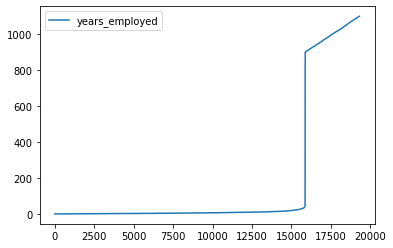

In [24]:
data_sort.plot(y='years_employed')

<div class="alert alert-info"> <b> 1000+ years!? </b> <br>
A significant portion of our dataset has been employed for more than 800 years! <br>
    This will certainly skew any conclusions we have that references this important metric. <br>
    How would this data even get imputed this way? Is the banker measuring the person's time worked in seconds? <br>
    Seems unlikely <br>
    Combined with the negative values we saw earlier in this column, I have VERY low trust in this column's accuracy.
</div>

[Let's now look at the client's age and whether there are any issues there. Again, think about what can data can be strange in this column, i.e. what cannot be someone's age.]

In [25]:
# Check the `dob_years` for suspicious values and count the percentage
data_age = data.sort_values(by = 'age', ignore_index = True)
data_age.reset_index(drop=True, inplace=True)
print(data.age.value_counts().sort_index())

0     101
19     14
20     51
21    111
22    183
23    253
24    264
25    357
26    407
27    492
28    501
29    545
30    539
31    558
32    508
33    579
34    600
35    616
36    555
37    535
38    596
39    573
40    607
41    605
42    595
43    512
44    545
45    497
46    472
47    480
48    537
49    508
50    512
51    447
52    484
53    458
54    477
55    442
56    487
57    458
58    461
59    443
60    377
61    354
62    352
63    268
64    264
65    194
66    183
67    167
68     99
69     84
70     65
71     58
72     33
73      8
74      6
75      1
Name: age, dtype: int64


<AxesSubplot:>

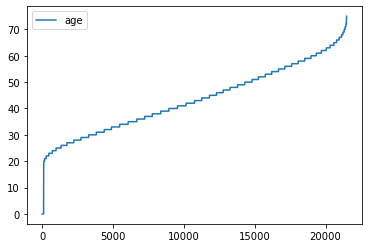

In [26]:
data_age.plot(y='age')

<div class="alert alert-info"> <b> 0 Years Old? </b> <br>
101 people Zero years old... that's not going to work. <br>
    compared to our dataset at large, 101 people is not that many <br>
<br>
    Our oldest person is 75, which is within the bounds of a normal human. <br>
    Check out the above graph: Our data skews towards older individuals, that's worth making a note of. <br>
</div>

<div class="alert alert-info"> <b> trending older </b> <br>
    Our oldest person is 75, which is within the bounds of a normal human lifespan, nothing odd there. <br>
    Check out the above graph though: Our data skews towards older individuals; it's not a standard distribution curve .<br>
    That's worth making a note of. <br>
</div>

In [27]:
# For our purposes, I think replaces the zeros with the the average (mean) is appropriate.
# To start, let's find the mean without the zeros.
# kind of overkill, but I wanted to see if I could figure out how to exclude the zeros from the caculation
# Since we know they're bogus.
data_age_no_zero = data_age[data_age['age']!=0]
#test
display(data_age_no_zero.head())

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
101,0,322.024011,19,secondary education,1,civil partnership,1,F,business,0,16588.237,to have a wedding,0.882258
102,0,111.762790,19,secondary education,1,civil partnership,1,M,business,0,14700.281,having a wedding,0.306199
103,0,796.983636,19,some college,2,married,0,F,employee,0,12929.944,buying property for renting out,2.183517
104,0,948.225743,19,some college,2,civil partnership,1,F,business,0,26753.823,buying a second-hand car,2.597879
105,0,695.968951,19,some college,2,unmarried,4,F,business,0,26443.044,cars,1.906764


In [28]:
# And the mean age is...
data_age_no_zero['age'].mean()

43.49950881788838

In [29]:
# replace all the zeros in ['age] with 43
data['age'] = data['age'].replace(0,43)

In [30]:
# Test - if sucessful our sorted age group should start at age 19, no zeros!
data['age'].value_counts().sort_index()

19     14
20     51
21    111
22    183
23    253
24    264
25    357
26    407
27    492
28    501
29    545
30    539
31    558
32    508
33    579
34    600
35    616
36    555
37    535
38    596
39    573
40    607
41    605
42    595
43    613
44    545
45    497
46    472
47    480
48    537
49    508
50    512
51    447
52    484
53    458
54    477
55    442
56    487
57    458
58    461
59    443
60    377
61    354
62    352
63    268
64    264
65    194
66    183
67    167
68     99
69     84
70     65
71     58
72     33
73      8
74      6
75      1
Name: age, dtype: int64

[Now let's check the `family_status` column. See what kind of values there are and what problems you may need to address.]

In [31]:
# Let's see the values for the column
#dropna = False to confirm we don't have NaN values in this column
data['family_status'].value_counts(dropna=False)


married              12351
civil partnership     4172
unmarried             2808
divorced              1191
widow / widower        956
Name: family_status, dtype: int64

<div class="alert alert-info"> <b> To wed or not to wed</b> <br>
   My personal values choice would be to combine unmarried and divorced <br>
   But besides that, I don't see any problems with this column
</div>

In [32]:
# What's going on with the family_status_id'? Do these corrilate with the 'family_status' column?
print(data['family_status_id'].value_counts())

0    12351
1     4172
4     2808
3     1191
2      956
Name: family_status_id, dtype: int64


In [33]:
# Let's break out a pivot table to check.
display(data.pivot_table(index='family_status_id', columns='family_status', values='debt', aggfunc='count', margins=True))

family_status,civil partnership,divorced,married,unmarried,widow / widower,All
family_status_id,,,,,,
0,NaN,NaN,12351.0,NaN,NaN,12351
1,4172.0,NaN,NaN,NaN,NaN,4172
2,NaN,NaN,NaN,NaN,956.0,956
3,NaN,1191.0,NaN,NaN,NaN,1191
4,NaN,NaN,NaN,2808.0,NaN,2808
All,4172.0,1191.0,12351.0,2808.0,956.0,21478


<div class="alert alert-info"> <b> 'family_status_id' == 'family_status'</b> <br>
0 == married <br>
1 == civil partnership <br>
2 == widow / widower<br>
3 == divorced <br> 
4 == unmarried <br>
</div>

<div class="alert alert-info"> <b> No Problems</b> <br>
I stil don't see any problems with this column. Please let me know if I overlooked something.
</div>

[Now let's check the `gender` column. See what kind of values there are and what problems you may need to address]

In [34]:
# Let's see the values in the gender column
data['gender'].value_counts()

F      14201
M       7276
XNA        1
Name: gender, dtype: int64

<div class="alert alert-info"> <b> 1 outlier</b> <br>
It looks like 1 person would prefer not to be identified by gender, or the data is corrupted. <br>
    Unfortunetly, we can't draw any conclusions from 1 person about weather or not XNA gender idenified people pay they're debts. <br>
    let's drop row from our data set and move on. <br>
</div>

In [35]:
#drop XNA

#Which of these two solutions is best practices?

#data_copy = data[data.gender != 'XNA']

#OR

data.drop(data.loc[data['gender']=='XNA'].index, inplace=True)

In [36]:
# Check the result
data['gender'].value_counts()


F    14201
M     7276
Name: gender, dtype: int64

[Now let's check the `income_type` column. See what kind of values there are and what problems you may need to address]

In [37]:
# Let's see the values in the column
data['income_type'].value_counts()

employee                       11093
business                        5075
retiree                         3848
civil servant                   1455
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

<div class="alert alert-info"> <b> Notes</b> <br>
    employee, business, and entrepreneur? These can probably be combined. <br>
    We don't have any reason to think "business" is "business owner", and it doesn't match our "2" entrepreneurs <br>
    We Don't have a category for investment income, or Rent <br>
    <br>
    These 4 designations have so few data points, they're effectively useless.<br>
2 ==    unemployed <br>
2 == entrepreneur <br>
1 == paternity / maternity leave <br>
1 == student <br>
    <br>
    That means our useful consolidated categories will be: <br>
    business <br>
    retiree <br>
    civil servant <br>
    <br>
    I plan to drop: <br>
    student <br>
    paternity / maternity leave <br>
    unemployed <br>
    <br>
    They don't fit any other category, and lack sufficent data to stand on their own. <br>
    
</div>

In [38]:
# replace employee with business
data['income_type'].replace(to_replace = 'employee', value= 'business', inplace = True)

# replace entrepreneur with business
data['income_type'].replace(to_replace = 'entrepreneur', value= 'business', inplace = True)

# drop student
data.drop(data.loc[data['income_type']=='student' ].index, inplace=True)

# drop paternity / maternity leave
data.drop(data.loc[data['income_type']=='paternity / maternity leave' ].index, inplace=True)

# drop unemployed
data.drop(data.loc[data['income_type']=='unemployed ' ].index, inplace=True)

In [39]:
# Check the result - make sure it's fixed
data['income_type'].value_counts()


business         16170
retiree           3848
civil servant     1455
unemployed           2
Name: income_type, dtype: int64

<div class="alert alert-info"> <b> purpose </b> <br>
   The purpose column tells us why people are taking out these loans. <br>
    It's a mess. <br>
    Let's clean it up. <br>
</div>

In [40]:
data.purpose.value_counts()

wedding ceremony                            797
having a wedding                            776
to have a wedding                           773
real estate transactions                    674
buy commercial real estate                  664
housing transactions                        652
buying property for renting out             652
transactions with commercial real estate    650
housing                                     646
purchase of the house                       644
purchase of the house for my family         641
property                                    633
construction of own property                633
transactions with my real estate            627
building a real estate                      623
building a property                         620
buy real estate                             620
purchase of my own house                    619
housing renovation                          611
buy residential real estate                 605
buying my own car                       

<div class="alert alert-info"> <b> So many reasons! </b> <br>
   That's a lot of differenet reasons to take out a loan. <br>
   We will consolidate into some broad categories <br>
   And then use dictionares to consolidate the data into those categories. <br>
    <br>
   Lots of real estate transactions: Residential, Comercial, New Construction, Remodel. <br>
   Unfortunetly much of the Real Estate Data is unclear. "Real Estate Transaction", and "property" are not very clear. <br>
   In a real world data set, we would want to break out comercial loans into new construction, the vereous types of multi family transactions, and the vareous types of comercial, etc. - loaning money for new warehouse constuction has a comletly different risk profile then remodeling an existing hospital, as an example. <br>
    Similar distictions should be drawn between new cars and used cars. <br>
    As well as the different types of education, Ceramics at the local community college and a masters degree in cermaics and materials sciences have very different risk profiles. <br>
    <br>
    If we consolidate these into a few broad categories, we might lose some nuance, especially in real estate, but it will probably make the datasset more useful overall. <br>
    Frustratingly, many of the real estate categories could be either comercial or residential, and in trying to categorize them into one category or the other, we actually loose fidelity, rather than improve it.
    <br>
    -- education - There are 9 education categories <br>
    -- car - There are 9 car categories <br>
    -- Weddings - there are 3 wedding categories <br>
    -- Real Estate - there are 17 real estate categoires <br>
    -- 38 purposes for taking out a loan in total... hmmm. <br>
    <br>
    Let's keep the original data in the dataframe, and create a new column with consolidated categories.
</div>



In [41]:
#Note: There is a more ellegant way to do this using dictionaries, and maybe apply(),
#but I can't quite figure it out, so here we are with this clunky work around.

#Not memory or process efficent at all, =^|

# Create a new column 'loan_purpose' which is a copy of the 'purpose' data
data['loan_purpose'] = data['purpose']

#replace the data in 'loan_purpose'

#wedding
data['loan_purpose'].replace('wedding ceremony', 'wedding', inplace = True)
data['loan_purpose'].replace('having a wedding', 'wedding', inplace = True)
data['loan_purpose'].replace('to have a wedding', 'wedding', inplace = True)

#car
data['loan_purpose'].replace('buying my own car', 'auto', inplace = True)
data['loan_purpose'].replace('car', 'auto', inplace = True)
data['loan_purpose'].replace('second-hand car purchase', 'auto', inplace = True)
data['loan_purpose'].replace('to own a car', 'auto', inplace = True)
data['loan_purpose'].replace('buying a second-hand car', 'auto', inplace = True)
data['loan_purpose'].replace('cars', 'auto', inplace = True)
data['loan_purpose'].replace('to buy a car', 'auto', inplace = True)
data['loan_purpose'].replace('car purchase', 'auto', inplace = True)
data['loan_purpose'].replace('purchase of a car', 'auto', inplace = True)

#Education
data['loan_purpose'].replace('going to university', 'education', inplace = True)
data['loan_purpose'].replace('supplementary education', 'education', inplace = True)
data['loan_purpose'].replace('university education', 'education', inplace = True)
data['loan_purpose'].replace('to get a supplementary education', 'education', inplace = True)
#data['loan_purpose'].replace('education', 'education', inplace = True)
data['loan_purpose'].replace('getting an education', 'education', inplace = True)
data['loan_purpose'].replace('profile education', 'education', inplace = True)
data['loan_purpose'].replace('getting higher education', 'education', inplace = True)
data['loan_purpose'].replace('to become educated', 'education', inplace = True)

#Real Estate
data['loan_purpose'].replace('real estate transactions', 'real estate', inplace = True)
data['loan_purpose'].replace('buy commercial real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('buying property for renting out', 'real estate', inplace = True)
data['loan_purpose'].replace('housing transactions', 'real estate', inplace = True)
data['loan_purpose'].replace('transactions with commercial real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('housing', 'real estate', inplace = True)
data['loan_purpose'].replace('purchase of the house', 'real estate', inplace = True)
data['loan_purpose'].replace('purchase of the house for my family', 'real estate', inplace = True)
data['loan_purpose'].replace('construction of own property', 'real estate', inplace = True)
data['loan_purpose'].replace('property', 'real estate', inplace = True)
data['loan_purpose'].replace('transactions with my real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('building a real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('building a property', 'real estate', inplace = True)
data['loan_purpose'].replace('buy real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('purchase of my own house', 'real estate', inplace = True)
data['loan_purpose'].replace('housing renovation', 'real estate', inplace = True)
data['loan_purpose'].replace('buy residential real estate', 'real estate', inplace = True)


#test
data.head(15)
#data.head(-15)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,business,0,40620.102,purchase of the house,23.116912,real estate
1,1,4024.803754,36,secondary education,1,married,0,F,business,0,17932.802,car purchase,11.026860,auto
2,0,5623.422610,33,secondary education,1,married,0,M,business,0,23341.752,purchase of the house,15.406637,real estate
3,3,4124.747207,32,secondary education,1,married,0,M,business,0,42820.568,supplementary education,11.300677,education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,wedding
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495,real estate
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,7.888225,real estate
7,0,152.779569,50,secondary education,1,married,0,M,business,0,21731.829,education,0.418574,education
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,business,0,15337.093,having a wedding,18.985932,wedding
9,0,2188.756445,41,secondary education,1,married,0,M,business,0,23108.150,purchase of the house for my family,5.996593,real estate


<div class="alert alert-info"> <b> Drop Dupes </b> <br>
   Let's drop some dupes! <br>
    =^)
</div>

In [42]:
# Checking duplicates
data.duplicated().sum()


96

<div class="alert alert-info"> <b> Index </b> <br>
   I think I messed up my index here - would love some help sorting it out. <br>
</div>

In [43]:
# Address the duplicates, if they exist

data = data.drop_duplicates()
#data = data.reset_index()

In [44]:
# Last check whether we have any duplicates
data.duplicated().sum()

0

In [45]:
# Check the size of the dataset that you now have after your first manipulations with it
data.size

299306

In [46]:
print(f'There were {number_of_rows} in the original dataframe')
#data.info()
index_data = data.index
number_of_rows_data = len(index_data)
print(f'There are now {number_of_rows_data} in the curenet dataframe')
print(f'{number_of_rows} - {number_of_rows_data} == {number_of_rows - number_of_rows_data}')
print(f'148 / {number_of_rows} == {148 / number_of_rows}, or less than 1% of rows removed')

There were 21525 in the original dataframe
There are now 21379 in the curenet dataframe
21525 - 21379 == 146
148 / 21525 == 0.006875725900116144, or less than 1% of rows removed


<div class="alert alert-info"> <b> Dataset Overview </b> <br>
   We removed 148 rows from the original dataframe, or less than 1%. <br>
   children - We droped 47 rows with a -1 for the number of children. We did this because we beleive there may be a strong corrilation between number of children and debt repayment, and using an mean or median lacked the nessisary precision. <br>
   We dropped 1 row where the gender was listed as XNA <br>
   We dropped 4 outlier rows from the income_type column <br>
   We dropped 96 duplicates <br>
   <br>
   We consolidated and cleaned the education section by making all the data in the column lowercase - no material change to the data. <br>
   We found 101 individuals who are zero years old. We amended their age to become 43, which is the mean.
    The days_employed column is frought with problems. Many entires were negative. We used absolute value to make them possitive. <br.>
    <br>
    *** !!! Note: ['days_employed'] AND ['total_income'] NaN values are still present in this dataset !!! ***<br>
    *** !!! Note: days_employed still has ouragously large numbers, with some people having worked for 800+ years !!! *** <br>
    *** !!! These 2 issues have not yet been fixed !!! *** <br>
    <br>
    In Summary, this dataset is a mess, with significant data corruption issues in the key metrics of days_employed and total_income. <br>
    Either choice of deleting or altering 10% of a dataset is an extream choice.
    
    
</div>

# Working with missing values

[To speed up working with some data, you may want to work with dictionaries for some values, where IDs are provided. Explain why and which dictionaries you will work with.]

In [47]:
# Find the dictionaries

#I'm not sure what this prompt is asking...

In [48]:
display(data.isna().sum())

children               0
days_employed       2075
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2075
purpose                0
years_employed      2075
loan_purpose           0
dtype: int64

### Restoring missing values in `total_income`

<div class="alert alert-info"> <b> Missing Values</b> <br>
   indicated in the cell above, days_employed and total_income both have NaN values, and we determined in this notebook that the rows are syncronus, meaning the same rows are missing both values in all cases. years_employed also has NaN values, as we created that column by referencing days_employed. <br>
    <br>
    Next Steps: <br>
    > address total_income missing values <br>
    <br>
    > create an age category for clients <br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;18-30 <br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;31-40 <br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;41-55 <br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;z56-75+ <br>
    <br>
    > create a new column with the age category <br>
    
</div>

[Briefly state which column(s) have values missing that you need to address. Explain how you will fix them.]


[Start with addressing total income missing values. Create and age category for clients. Create a new column with the age category. This strategy can help with calculating values for the total income.]


<div class="alert alert-info"> <b> A Question about age groups? </b> <br>
What are best practices for identifying and labeling age groups? I have no experience with this at all.
    
</div>

In [49]:
# Let's write a function that calculates the age category
    
def age_group(df):

    """ create an age category for clients according to these rules
    >18 - error, child
    19-30 - early career
    31-40 - mid career
    41-55 - executive
    56-64 - senior executive
    65-122 - retired
    123+ - deceased
    """
    age=df
    
    
    if age <= 18:
        return 'error, child'
    if age >= 19:
        if age <= 30:
            return 'early career'
    if age >=31:
        if age <= 40:
            return 'mid career'
    if age >= 41:
        if age <= 55:
            return 'Executive'
    if age >= 56:
        if age <= 64:
            return 'Senior Executive'
    if age >= 65:
        if age <= 122:
            return 'retired'
    if age >= 123:
        return 'deceased'


In [50]:
# Test if the function works
print(age_group(18))
print(age_group(19))
print(age_group(31))
print(age_group(40))
print(age_group(41))
print(age_group(55))
print(age_group(56))
print(age_group(64))
print(age_group(65))
print(age_group(121))
print(age_group(122))
print(age_group(123))

error, child
early career
mid career
mid career
Executive
Executive
Senior Executive
Senior Executive
retired
retired
retired
deceased


In [51]:
# Creating new column based on function
data['age_group'] = data['age'].apply(lambda row: age_group(row))

In [52]:
# Checking how values in the new column
data['age_group'].value_counts()

Executive           7636
mid career          5706
early career        3708
Senior Executive    3435
retired              894
Name: age_group, dtype: int64

[Think about the factors on which income usually depends. Eventually, you will want to find out whether you should use mean or median values for replacing missing values. To make this decision you will probably want to look at the distribution of the factors you identified as impacting one's income.]

[Create a table that only has data without missing values. This data will be used to restore the missing values.]

In [53]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
data_skip = data.dropna()
#data_skip.isna().sum()

data_skip.head(15)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,business,0,40620.102,purchase of the house,23.116912,real estate,Executive
1,1,4024.803754,36,secondary education,1,married,0,F,business,0,17932.802,car purchase,11.026860,auto,mid career
2,0,5623.422610,33,secondary education,1,married,0,M,business,0,23341.752,purchase of the house,15.406637,real estate,mid career
3,3,4124.747207,32,secondary education,1,married,0,M,business,0,42820.568,supplementary education,11.300677,education,mid career
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,wedding,Executive
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495,real estate,early career
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,7.888225,real estate,Executive
7,0,152.779569,50,secondary education,1,married,0,M,business,0,21731.829,education,0.418574,education,Executive
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,business,0,15337.093,having a wedding,18.985932,wedding,mid career
9,0,2188.756445,41,secondary education,1,married,0,M,business,0,23108.150,purchase of the house for my family,5.996593,real estate,Executive


In [54]:
# Look at the mean values for income based on your identified factors
data.groupby('loan_purpose').mean()

,children,days_employed,age,education_id,family_status_id,debt,total_income,years_employed
loan_purpose,,,,,,,,
auto,0.470986,69007.708714,43.706828,0.820322,0.990212,0.093451,26783.457512,189.062216
education,0.484992,68274.637263,43.599300,0.827914,0.954727,0.092546,26320.837471,187.053801
real estate,0.482685,65618.744747,43.360227,0.815059,0.970012,0.072602,27028.439750,179.777383
wedding,0.471324,66980.134991,43.396723,0.800776,1.000000,0.080207,26532.593640,183.507219


In [55]:
#rounding the total_income column so it's easier to read
data['total_income'] = data['total_income'].apply(np.ceil)

# Can't convert floats to int until we fill the NaN data :^(
#data['total_income'] = data['total_income'].astype(int)

#data.head()

In [56]:
# age vs income_type
display(data.pivot_table(index='loan_purpose', columns='income_type', values='total_income', aggfunc='mean', margins=True))


income_type,business,civil servant,retiree,unemployed,All
loan_purpose,,,,,
auto,28011.152316,27107.767442,21656.777311,NaN,26783.959866
education,27222.330262,27675.439462,22109.164110,NaN,26321.343367
real estate,28202.911849,27210.698389,21874.451061,21015.0,27028.936601
wedding,27362.054465,27759.736111,22561.114973,NaN,26533.115403
All,27890.574255,27330.073394,21948.498254,21015.0,26794.228450


In [57]:
# Look at the median values for income based on your identified factors
display(data.pivot_table(index='loan_purpose', columns='income_type', values='total_income', aggfunc='median', margins=True))


income_type,business,civil servant,retiree,unemployed,All
loan_purpose,,,,,
auto,24174.0,23162.0,19163.5,NaN,23044.0
education,23403.0,24349.0,18805.5,NaN,22933.5
real estate,24558.0,23837.0,18836.0,21015.0,23459.5
wedding,23854.0,25215.0,19338.0,NaN,23067.0
All,24206.5,24072.5,18969.5,21015.0,23203.5


[Repeat such comparisons for multiple factors. Make sure you consider different aspects and explain your thinking process.]



income_type,business,civil servant,retiree,unemployed,All
age_group,,,,,
Executive,28324.910912,27723.266667,23131.339355,32436.0,27695.572631
Senior Executive,28874.949858,27352.018519,22031.362168,NaN,24563.237354
early career,25892.803035,25095.145098,15960.666667,NaN,25814.483919
mid career,28458.695163,28243.322581,22165.416667,9594.0,28394.236903
retired,28296.060000,26922.470588,20451.927143,NaN,21546.679315
All,27890.574255,27330.073394,21948.498254,21015.0,26794.228450


<AxesSubplot:title={'center':'total_income by age_group and income_type, mean'}, ylabel='age_group'>

income_type,business,civil servant,retiree,unemployed,All
age_group,,,,,
Executive,24361.5,23217.0,19991.0,32436.0,23783.0
Senior Executive,25330.0,24221.0,19402.0,NaN,21336.0
early career,22956.0,23203.0,13553.5,NaN,22957.5
mid career,24887.5,25016.0,18475.5,9594.0,24847.5
retired,25164.5,26090.0,17595.0,NaN,18435.0
All,24206.5,24072.5,18969.5,21015.0,23203.5


<AxesSubplot:title={'center':'total_income by age_group and income_type, mean'}, ylabel='age_group'>

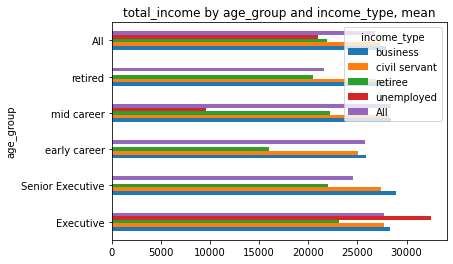

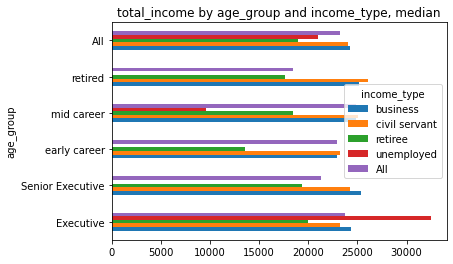

In [58]:
#age_group and income_type, mean
display(data.pivot_table(index='age_group', columns='income_type', values='total_income', aggfunc='mean', margins=True))

#plot
ax_mean = data.pivot_table(index='age_group', columns='income_type', values='total_income', aggfunc='mean', margins=True).plot(kind='barh', stacked=False, title='total_income by age_group and income_type, mean')
display(ax_mean)

#age_group and income_type, median
display(data.pivot_table(index='age_group', columns='income_type', values='total_income', aggfunc='median', margins=True))

#plot
ax_median = data.pivot_table(index='age_group', columns='income_type', values='total_income', aggfunc='median', margins=True).plot(kind='barh', stacked=False, title='total_income by age_group and income_type, median')
display(ax_mean)


<div class="alert alert-info"> <b> 56-64 unemployed, not retired, is highest income category </b> <br>
Something is odd with 56-64 unemployed people.  I'm assuming this category has contaminated data, and is not reconizing income from retirement and/or investmenet assts. <br>
<br>
    let's not base our descision on the intersection of income_type and age, since this corrilation is contaminated at the high end.
    
</div>

<div class="alert alert-info"> <b> How about age and gender? </b> <br>

</div>

gender,F,M,All
age_group,,,
Executive,25522.095840,32247.479120,27695.572631
Senior Executive,23446.252903,27984.830040,24563.237354
early career,23462.347514,29076.046198,25814.483919
mid career,25760.768938,32550.610805,28394.236903
retired,20949.294212,23452.184615,21546.679315
All,24662.131006,30910.500380,26794.228450


<AxesSubplot:title={'center':'total_income by age_group and income_type, mean'}, ylabel='age_group'>

gender,F,M,All
age_group,,,
Executive,22071.0,27590.0,23783.0
Senior Executive,20420.0,24709.0,21336.0
early career,20826.0,26003.0,22957.5
mid career,22346.0,28364.0,24847.5
retired,18028.5,19558.0,18435.0
All,21463.0,26839.0,23203.5


<AxesSubplot:title={'center':'total_income by age_group and income_type, mean'}, ylabel='age_group'>

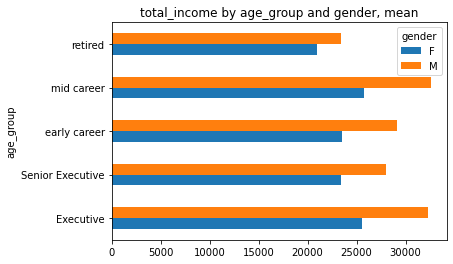

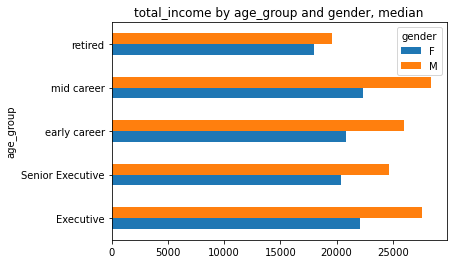

In [59]:
#age_group and gender, mean
display(data.pivot_table(index='age_group', columns='gender', values='total_income', aggfunc='mean', margins=True))

#plot
ax_gender_mean = data.pivot_table(index='age_group', columns='gender', values='total_income', aggfunc='mean', margins=False).plot(kind='barh', stacked=False, title='total_income by age_group and gender, mean')
display(ax_mean)

#age_group and income_type, median
display(data.pivot_table(index='age_group', columns='gender', values='total_income', aggfunc='median', margins=True))

#plot
ax_gender_median = data.pivot_table(index='age_group', columns='gender', values='total_income', aggfunc='median', margins=False).plot(kind='barh', stacked=False, title='total_income by age_group and gender, median')
display(ax_mean)

<div class="alert alert-info"> <b> How about family status and children? </b> <br>

</div>

In [60]:
data.head(1)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,business,0,40621.0,purchase of the house,23.116912,real estate,Executive


children,0,1,2,3,4,5,All
family_status,,,,,,,
civil partnership,26439.679253,27200.678930,27084.018987,28340.755556,26508.000000,20177.000000,26698.727809
divorced,27027.988780,27990.667857,26470.720000,23309.000000,52886.000000,NaN,27228.566265
married,26587.245513,27554.546403,27776.072524,29913.920354,27107.000000,28282.428571,27043.945029
unmarried,26991.477127,27174.825553,25295.527778,22413.428571,12625.000000,NaN,26954.215873
widow / widower,22818.832454,23154.236842,25037.900000,32523.833333,26236.000000,NaN,22971.584204
All,26423.265345,27396.988257,27489.190402,29323.153061,27290.323529,27269.250000,26794.228450


<AxesSubplot:title={'center':'total_income by family and children, mean'}, ylabel='family_status'>

children,0,1,2,3,4,5,All
family_status,,,,,,,
civil partnership,23157.0,23362.0,22204.0,25401.0,20313.0,20177.0,23192.0
divorced,24029.0,23702.5,22547.0,21342.0,52886.0,NaN,23655.0
married,23170.0,23955.0,23476.0,25707.0,25211.0,32679.0,23383.0
unmarried,23314.0,23310.0,21617.5,21427.0,12625.0,NaN,23161.5
widow / widower,20270.5,21878.0,24501.0,29286.0,26236.0,NaN,20495.0
All,23030.5,23671.0,23144.0,25156.0,24982.0,29816.5,23203.5


<AxesSubplot:title={'center':'total_income by family and children, median'}, ylabel='family_status'>

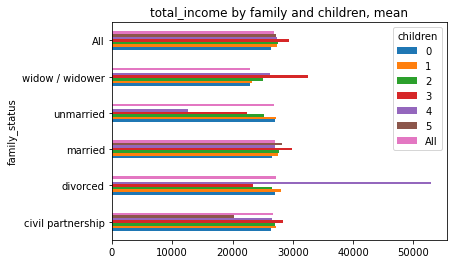

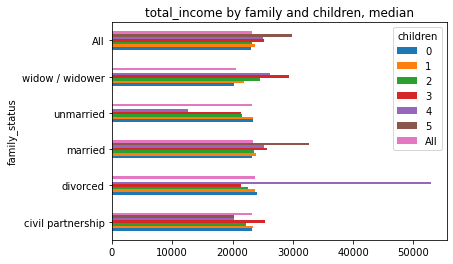

In [61]:
#family status, children, and income_type, mean
display(data.pivot_table(index='family_status', columns='children', values='total_income', aggfunc='mean', margins=True))

#plot
ax_mean_family = data.pivot_table(index='family_status', columns='children', values='total_income', aggfunc='mean', margins=True).plot(kind='barh', stacked=False, title='total_income by family and children, mean')
display(ax_mean_family)

#family status, children, and income_type, median
display(data.pivot_table(index='family_status', columns='children', values='total_income', aggfunc='median', margins=True))

#plot
ax_median_family = data.pivot_table(index='family_status', columns='children', values='total_income', aggfunc='median', margins=True).plot(kind='barh', stacked=False, title='total_income by family and children, median')
display(ax_median_family)

<div class="alert alert-info"> <b> What is going on with Divorced people with 4 children! $$$ </b> <br>

</div>

In [62]:
data_divorced_four = data[(data['family_status'] == 'divorced') & (data['children'] == 4)]
display(data_divorced_four)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose,age_group
2641,4,344.926495,36,bachelor's degree,0,divorced,3,F,civil servant,0,52886.0,to buy a car,0.945004,auto,mid career


<div class="alert alert-info"> <b> Divorced-4 is a Single data point </b> <br>
There is only one data point for divorced with 4 children, and they're on the high end for income in our dataset. <br>
Which brings up an interesting point, if this dataset is in USD, the numbers are VERY low overall. <br>
The Median and Mean are both below the national poverly line
</div>

debt,0,1,All
education,,,
bachelor's degree,32194.697620,31321.665468,32148.353733
graduate degree,27960.500000,NaN,27960.500000
primary education,21172.147410,22322.758065,21298.632979
secondary education,24474.732291,24373.381057,24465.597803
some college,27908.213650,34027.830882,28469.041105
All,26500.671207,25825.109833,26445.720029


<AxesSubplot:title={'center':'total_income by family and children, mean'}, ylabel='family_status'>

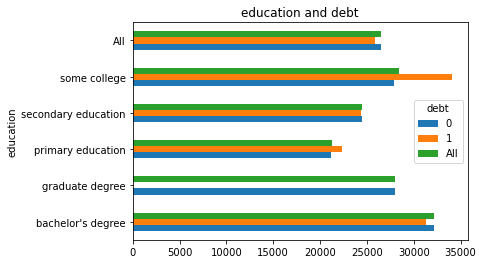

In [127]:
#Looking at education and debt
display(data.pivot_table(index='education', columns='debt', values='total_income', margins=True))

#plot
ax_mean_edu = data.pivot_table(index='education', columns='debt', values='total_income', margins=True).plot(kind='barh', stacked=False, title='education and debt')
display(ax_mean_family)


<div class="alert alert-info"> <b> Mean, Median, or Mode? </b> <br>
We're going to use the *** median *** income to limitthe influence of outlier data at the high and low extreams of income for our dataset.
</div>

In [100]:
#  Write a function that we will use for filling in missing values
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median()) 
data['total_income'] = data['total_income'].fillna(data['total_income'].median()) 
data['years_employed'] = data['years_employed'].fillna(data['years_employed'].median()) 



In [106]:
#test
print(data['days_employed'].isna().sum())
print(data['total_income'].isna().sum())
print(data['years_employed'].isna().sum())
data.head(15)

0
0
0


,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,business,0,40621.0,purchase of the house,23.116912,real estate,Executive
1,1,4024.803754,36,secondary education,1,married,0,F,business,0,17933.0,car purchase,11.026860,auto,mid career
2,0,5623.422610,33,secondary education,1,married,0,M,business,0,23342.0,purchase of the house,15.406637,real estate,mid career
3,3,4124.747207,32,secondary education,1,married,0,M,business,0,42821.0,supplementary education,11.300677,education,mid career
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25379.0,to have a wedding,932.235814,wedding,Executive
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40923.0,purchase of the house,2.537495,real estate,early career
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38485.0,housing transactions,7.888225,real estate,Executive
7,0,152.779569,50,secondary education,1,married,0,M,business,0,21732.0,education,0.418574,education,Executive
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,business,0,15338.0,having a wedding,18.985932,wedding,mid career
9,0,2188.756445,41,secondary education,1,married,0,M,business,0,23109.0,purchase of the house for my family,5.996593,real estate,Executive


In [107]:
# Checking Data integrety
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21379 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21379 non-null  int64  
 1   days_employed     21379 non-null  float64
 2   age               21379 non-null  int64  
 3   education         21379 non-null  object 
 4   education_id      21379 non-null  int64  
 5   family_status     21379 non-null  object 
 6   family_status_id  21379 non-null  int64  
 7   gender            21379 non-null  object 
 8   income_type       21379 non-null  object 
 9   debt              21379 non-null  int64  
 10  total_income      21379 non-null  float64
 11  purpose           21379 non-null  object 
 12  years_employed    21379 non-null  float64
 13  loan_purpose      21379 non-null  object 
 14  age_group         21379 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 2.6+ MB


In [108]:
#Nan Check
data.isna().sum()

children            0
days_employed       0
age                 0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
loan_purpose        0
age_group           0
dtype: int64

<div class="alert alert-info"> <b> 21379 rows  </b> <br>
we had 21379 rows before, it still holds true
</div>

## Categorization of data

[To answer the questions and test the hypotheses, you will want to work with categorized data. Look at the questions that were posed to you and that you should answer. Think about which of the data will need to be categorized to answer these questions. Below you will find a template through which you can work your way when categorizing data. The first step-by-step processing covers the text data; the second one addresses the numerical data that needs to be categorized. You can use both or none of the suggested instructions - it's up to you.]

[Despite of how you decide to address the categorization, make sure to provide clear explanation of why you made your decision. Remember: this is your work and you make all decisions in it.]


In [77]:
# Print the values for your selected data for categorization



<div class="alert alert-info"> <b> ???  </b> <br>
The above prompt is not clear to me. What is it asking?
</div>

[Let's check unique values]

In [78]:
# Check the unique values

[What main groups can you identify based on the unique values?]

[Based on these themes, we will probably want to categorize our data.]


In [79]:
# Let's write a function to categorize the data based on common topics


In [80]:
# Create a column with the categories and count the values for them



[If you decide to categorize the numerical data, you'll need to come up with the categories for it too.]

In [81]:
# Looking through all the numerical data in your selected column for categorization


In [82]:
# Getting summary statistics for the column



[Decide what ranges you will use for grouping and explain why.]

In [83]:
# Creating function for categorizing into different numerical groups based on ranges



In [84]:
# Creating column with categories


In [85]:
# Count each categories values to see the distribution


## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

loan_purpose,auto,education,real estate,wedding,All
children,,,,,
0,0.085503,0.086775,0.067403,0.075311,0.075551
1,0.106957,0.104046,0.081800,0.095865,0.092404
2,0.118357,0.112710,0.084191,0.066964,0.094633
3,0.083333,0.057971,0.076923,0.156250,0.081818
4,0.100000,0.000000,0.142857,0.000000,0.097561
5,0.000000,0.000000,0.000000,0.000000,0.000000
All,0.093451,0.092546,0.072602,0.080207,0.081342


<AxesSubplot:title={'center':'Children and debt repayment'}, ylabel='children'>

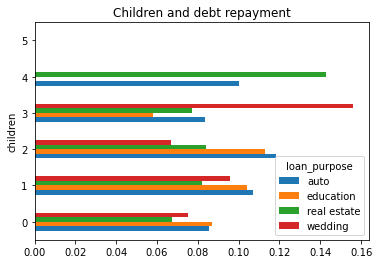

In [115]:
# Check the children data and paying back on time
'income_type'
#family status, children, and income_type, mean
display(data.pivot_table(index='children', columns='loan_purpose', values = 'debt', margins=True))

#plot
ax_children = data.pivot_table(index='children', columns='loan_purpose', values = 'debt', margins=False).plot(kind='barh', stacked=False, title='Children and debt repayment')
display(ax_children)


income_type,business,civil servant,retiree,unemployed,All
children,,,,,
0,0.083153,0.068129,0.056410,0.0,0.075551
1,0.098204,0.053672,0.050909,1.0,0.092404
2,0.100735,0.031746,0.103448,NaN,0.094633
3,0.083333,0.055556,0.166667,NaN,0.081818
4,0.121212,0.000000,0.000000,NaN,0.097561
5,0.000000,0.000000,NaN,NaN,0.000000
All,0.089176,0.059188,0.056530,0.5,0.081342


<AxesSubplot:title={'center':'Children, income type, and debt repayment'}, ylabel='children'>

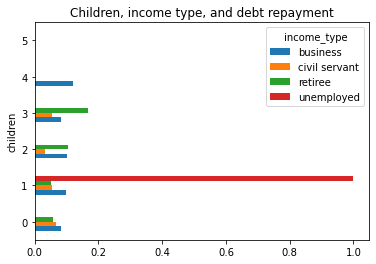

In [119]:
# Check the children data and paying back on time

#family status, children, and income_type, mean
display(data.pivot_table(index='children', columns='income_type', values = 'debt', margins=True))

#plot
ax_children = data.pivot_table(index='children', columns='income_type', values = 'debt', margins=False).plot(kind='barh', stacked=False, title='Children, income type, and debt repayment')
display(ax_children)


In [124]:
# Looking at what's happening with divorced families with 1 child. Default rate is very high!

data_unemployed_one = data[(data['family_status'] == 'divorced') & (data['children'] == 1)]
data_unemployed_one_debt = data[(data['family_status'] == 'divorced') & (data['children'] == 1) & (data['debt'] == 1)]
#print(data_unemployed_one.count())
display(data_unemployed_one.count())
display(data_unemployed_one_debt.count())

children            312
days_employed       312
age                 312
education           312
education_id        312
family_status       312
family_status_id    312
gender              312
income_type         312
debt                312
total_income        312
purpose             312
years_employed      312
loan_purpose        312
age_group           312
dtype: int64

children            21
days_employed       21
age                 21
education           21
education_id        21
family_status       21
family_status_id    21
gender              21
income_type         21
debt                21
total_income        21
purpose             21
years_employed      21
loan_purpose        21
age_group           21
dtype: int64

**Conclusion**

[Write your conclusions based on your manipulations and observations.]


**Is there a correlation between family status and paying back on time?**

income_type,business,civil servant,retiree,unemployed,All
family_status,,,,,
civil partnership,0.103406,0.068966,0.055470,0.0,0.093697
divorced,0.076319,0.049383,0.059633,NaN,0.071429
married,0.082001,0.055432,0.055072,1.0,0.075590
unmarried,0.107424,0.073171,0.045845,NaN,0.097752
widow / widower,0.064000,0.044444,0.069159,NaN,0.065969
All,0.089176,0.059188,0.056530,0.5,0.081342


<AxesSubplot:title={'center':'Children, income type, and debt repayment'}, ylabel='family_status'>

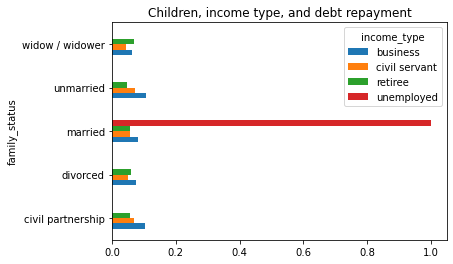

In [125]:
# Check the family status data and paying back on time

#family status, children, and income_type, mean
display(data.pivot_table(index='family_status', columns='income_type', values = 'debt', margins=True))

#plot
ax_children = data.pivot_table(index='family_status', columns='income_type', values = 'debt', margins=False).plot(kind='barh', stacked=False, title='Children, income type, and debt repayment')
display(ax_children)


# Calculating default-rate based on family status



**Conclusion**

[Write your conclusions based on your manipulations and observations.]

**Is there a correlation between income level and paying back on time?**

In [88]:
# Check the income level data and paying back on time



# Calculating default-rate based on income level



**Conclusion**

[Write your conclusions based on your manipulations and observations.]

**How does credit purpose affect the default rate?**

income_type,business,civil servant,retiree,unemployed,All
loan_purpose,,,,,
auto,0.102085,0.077193,0.064313,NaN,0.093451
education,0.099603,0.081712,0.066759,NaN,0.092546
real estate,0.080330,0.047809,0.048755,0.5,0.072602
wedding,0.088557,0.044304,0.059242,NaN,0.080207
All,0.089176,0.059188,0.056530,0.5,0.081342


<AxesSubplot:title={'center':'loan_purpose, income type, and debt repayment'}, ylabel='loan_purpose'>

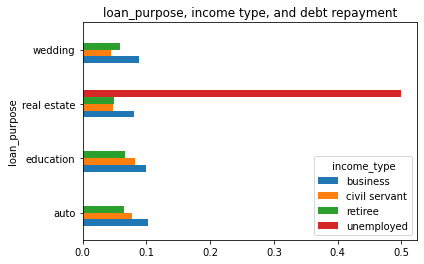

In [126]:
# Check the percentages for default rate for each credit purpose and analyze them

#loan_purpose, and income_type, mean
display(data.pivot_table(index='loan_purpose', columns='income_type', values = 'debt', margins=True))

#plot
ax_children = data.pivot_table(index='loan_purpose', columns='income_type', values = 'debt', margins=False).plot(kind='barh', stacked=False, title='loan_purpose, income type, and debt repayment')
display(ax_children)



**Conclusion**

[Write your conclusions based on your manipulations and observations.]


# General Conclusion 

[List your conclusions in this final section. Make sure you include all your important conclusions you made that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, and possible reasons and solutions for problematic artifacts that you had to address.]

[List your conclusions regarding the posed questions here as well.]
